<a href="https://colab.research.google.com/github/esradag/pytorch-derin-ogrenme/blob/main/01_PyTorch_%C4%B0%C5%9FAk%C4%B1%C5%9F%C4%B1_Temelleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch İş Akışı Temelleri

Makine öğrenimi ve derin öğrenimin özü, geçmişten bazı verileri almak, bu verilerdeki kalıpları keşfetmek için bir algoritma (örneğin bir sinir ağı) oluşturmak ve keşfedilen kalıpları geleceği tahmin etmek için kullanmaktır.

Bunu yapmanın birçok yolu vardır ve her zaman yeni yöntemler keşfedilmektedir.

Ama küçük başlayalım.

Düz bir doğru ile başlamaya ne dersiniz?

Ve PyTorch kullanarak bu doğrunun desenini öğrenip onu eşleştirebilen bir model oluşturmayı deneyelim.


## Neleri Kapsayacağız?

Bu modülde standart bir PyTorch iş akışını ele alacağız (gerekirse değiştirilebilir ancak temel adımları kapsar).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="bir pytorch iş akışı akış şeması"/>

Şimdilik bu iş akışını basit bir düz çizgiyi tahmin etmek için kullanacağız, ancak bu adımlar üzerinde çalıştığınız probleme göre tekrarlanabilir ve değiştirilebilir.

Özellikle şu konuları ele alacağız:

| **Konu** | **İçerik** |
| ----- | ----- |
| **1. Veriyi Hazırlama** | Veri neredeyse her şey olabilir ancak başlamak için basit bir düz çizgi oluşturacağız. |
| **2. Model Oluşturma** | Burada verideki kalıpları öğrenebilecek bir model oluşturacağız. Ayrıca bir **kayıp fonksiyonu**, **optimizasyon algoritması** seçecek ve bir **eğitim döngüsü** kuracağız. |
| **3. Modeli Veriye Uydurma (Eğitim)** | Artık verimiz ve modelimiz var, şimdi modelin (**eğitim**) verisindeki kalıpları bulmasını sağlayalım. |
| **4. Tahmin Yapma ve Modeli Değerlendirme (Çıkarım)** | Modelimiz verideki kalıpları buldu, şimdi bulduklarını gerçek (**test**) verileriyle karşılaştıralım. |
| **5. Modeli Kaydetme ve Yükleme** | Modelinizi başka bir yerde kullanmak veya daha sonra geri dönmek isteyebilirsiniz, burada bunu nasıl yapacağımızı ele alacağız. |
| **6. Tümünü Birleştirme** | Yukarıdakilerin hepsini alıp bir araya getirelim. |


## Nereden Yardım Alabilirsiniz?

Bu kursa ait tüm materyaller [GitHub üzerinde mevcuttur](https://github.com/mrdbourke/pytorch-deep-learning).

Herhangi bir sorunla karşılaşırsanız, [Tartışmalar sayfasında](https://github.com/mrdbourke/pytorch-deep-learning/discussions) soru sorabilirsiniz.

Ayrıca [PyTorch geliştirici forumları](https://discuss.pytorch.org/) da PyTorch ile ilgili her konuda oldukça faydalı bir kaynaktır.

Haydi, öğrendiğimiz konuları daha sonra başvurmak üzere bir sözlük (dictionary) içine yerleştirerek başlayalım.


In [1]:
what_were_covering = {
    1: "data (prepare and load)",                # Veriyi hazırlama ve yükleme
    2: "build model",                            # Model oluşturma
    3: "fitting the model to data (training)",   # Modeli veriye uydurma (eğitim)
    4: "making predictions and evaluating a model (inference)",  # Tahmin yapma ve modeli değerlendirme (çıkarım)
    5: "saving and loading a model",             # Modeli kaydetme ve yükleme
    6: "putting it all together"                 # Tümünü birleştirme
}


Şimdi bu modül için ihtiyaç duyacağımız kütüphaneleri içe aktaralım.

`torch`, `torch.nn` (buradaki `nn` sinir ağı anlamına gelir ve PyTorch'ta sinir ağları oluşturmak için gerekli yapı taşlarını içerir) ve `matplotlib` kütüphanelerini kullanacağız.


In [2]:
import torch
from torch import nn  # nn, PyTorch'un sinir ağları için tüm yapı taşlarını içerir
import matplotlib.pyplot as plt

# PyTorch sürümünü kontrol et
torch.__version__


'2.5.1+cu121'

## 1. Veri (Hazırlama ve Yükleme)

Makine öğreniminde "veri" neredeyse hayal edebileceğiniz her şey olabilir. Bir sayı tablosu (büyük bir Excel dosyası gibi), her türden görüntü, videolar (YouTube veriyle dolu!), şarkılar veya podcastler gibi ses dosyaları, protein yapıları, metinler ve daha fazlası.

![makine öğrenimi iki aşamalı bir oyundur: 1. verini temsil eden sayılar haline getir ve 2. bu temsili en iyi şekilde öğrenebilecek bir model seç veya oluştur](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

Makine öğrenimi iki aşamalı bir oyundur:  
1. Verinizi, ne olursa olsun, sayılara (bir temsile) dönüştürün.  
2. Bu temsili en iyi şekilde öğrenebilecek bir modeli seçin veya oluşturun.

Bazen bu iki adım aynı anda da yapılabilir.

Peki ya veriniz yoksa?

İşte şu anda bizim durumumuz bu.

Verimiz yok.

Ama veri oluşturabiliriz.

Verimizi düz bir doğru olarak oluşturalım.

[Doğrusal regresyon](https://tr.wikipedia.org/wiki/Do%C4%9Frusal_regresyon) kullanarak bilinen **parametrelerle** (bir model tarafından öğrenilebilecek şeyler) veri oluşturacağız ve ardından PyTorch kullanarak bu parametreleri [**gradyan inişi**](https://tr.wikipedia.org/wiki/Gradyan_ini%C5%9Fi) yöntemiyle tahmin edebilen bir model oluşturup oluşturamayacağımıza bakacağız.

Yukarıdaki terimler şu anda çok anlam ifade etmiyorsa endişelenmeyin, bunları uygulamalı olarak göreceğiz ve daha fazla bilgi edinebileceğiniz ekstra kaynakları aşağıda paylaşacağım.


In [3]:
# *Bilinen* parametreleri oluştur
weight = 0.7  # Ağırlık (eğim)
bias = 0.3    # Bias (sapma)

# Veriyi oluştur
start = 0      # Başlangıç değeri
end = 1        # Bitiş değeri
step = 0.02    # Adım değeri

# X değerlerini oluştur ve boyutunu genişlet (unsqueeze ile 2D tensör yapıyoruz)
X = torch.arange(start, end, step).unsqueeze(dim=1)

# Y değerlerini doğrusal denklemle oluştur: y = weight * X + bias
y = weight * X + bias

# İlk 10 veriyi görüntüle
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Harika! Şimdi `X` (**özellikler**) ile `y` (**etiketler**) arasındaki ilişkiyi öğrenebilecek bir model oluşturmaya geçiyoruz.


### Veriyi Eğitim ve Test Setlerine Ayırma

Artık elimizde bazı veriler var.

Ancak bir model oluşturmadan önce bu verileri bölmemiz gerekiyor.

Makine öğrenimi projelerindeki en önemli adımlardan biri, veriyi eğitim ve test setlerine (gerekirse doğrulama setine) ayırmaktır.

Veri kümesinin her bir bölümü belirli bir amaca hizmet eder:

| **Bölüm** | **Amaç** | **Toplam Verinin Oranı** | **Ne Sıklıkla Kullanılır?** |
| --------- | -------- | ----------------------- | --------------------------- |
| **Eğitim Seti (Training set)** | Model bu veriden öğrenir (dönem boyunca çalıştığınız ders materyalleri gibi). | ~%60-80 | Her zaman |
| **Doğrulama Seti (Validation set)** | Model bu veride ayarlanır (final sınavı öncesi çözdüğünüz deneme sınavı gibi). | ~%10-20 | Sık sık ama her zaman değil |
| **Test Seti (Testing set)** | Modelin öğrendiklerini değerlendirmek için kullanılır (dönem sonundaki final sınavı gibi). | ~%10-20 | Her zaman |

Şimdilik yalnızca eğitim ve test setlerini kullanacağız. Bu sayede modelimizin hem öğrenmesi hem de değerlendirilmesi için iki ayrı veri kümesi olacak.

Bu setleri, `X` ve `y` tensörlerimizi bölerek oluşturabiliriz.

> **Not:** Gerçek dünya verileriyle çalışırken bu adım genellikle projenin en başında yapılır (test seti her zaman diğer tüm verilerden ayrı tutulmalıdır). Modelin eğitim verisiyle öğrenmesini ve ardından test verisiyle değerlendirilmesini isteriz. Bu şekilde modelin **genelleme** yeteneğini, yani daha önce görmediği örnekler üzerindeki performansını ölçebiliriz.


In [4]:
# Eğitim/Test setlerini oluştur
train_split = int(0.8 * len(X))  # Verinin %80'i eğitim seti, %20'si test seti için ayrılır
X_train, y_train = X[:train_split], y[:train_split]  # Eğitim verisi
X_test, y_test = X[train_split:], y[train_split:]   # Test verisi

# Eğitim ve test setlerinin uzunluklarını kontrol et
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

Harika! Eğitim için (`X_train` ve `y_train`) 40 örneğimiz ve test için (`X_test` ve `y_test`) 10 örneğimiz var.

Oluşturacağımız model, `X_train` ve `y_train` arasındaki ilişkiyi öğrenmeye çalışacak ve ardından öğrendiklerini `X_test` ve `y_test` üzerinde değerlendireceğiz.

Ancak şu anda verilerimiz sadece sayılardan ibaret.

Haydi, bu verileri görselleştirmek için bir fonksiyon oluşturalım.


In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Eğitim verisini, test verisini ve tahminleri karşılaştırmalı olarak görselleştirir.
    """
    plt.figure(figsize=(10, 7))

    # Eğitim verisini mavi renkte göster
    plt.scatter(train_data, train_labels, c="b", s=4, label="Eğitim verisi")

    # Test verisini yeşil renkte göster
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test verisi")

    # Eğer tahminler varsa, kırmızı renkte göster
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Tahminler")

    # Göstergeyi ekle
    plt.legend(prop={"size": 14})


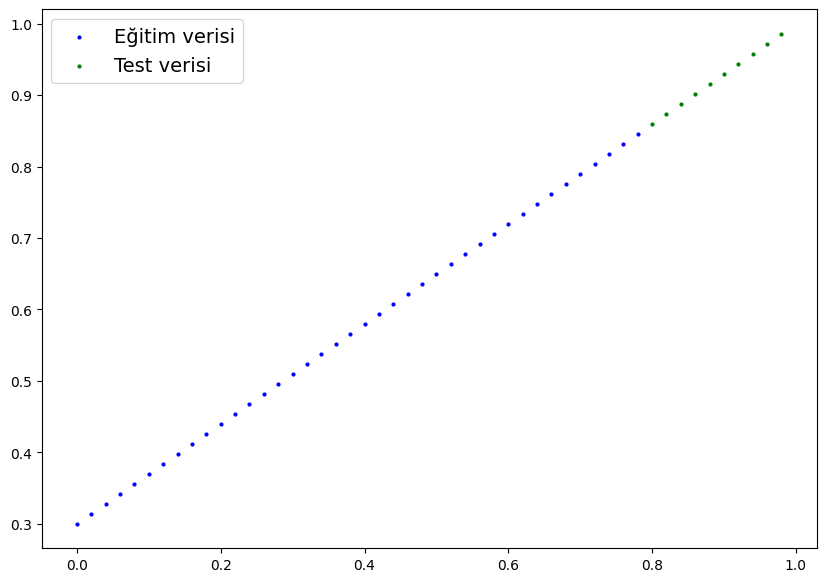

In [6]:
plot_predictions();

Efsane!

Artık verilerimiz sadece sayılardan ibaret değil, düz bir doğru şeklinde görselleştirildi.

> **Not:** Şimdi sizi veri keşifçilerinin mottosuyla tanıştırmanın tam zamanı... "görselleştir, görselleştir, görselleştir!"
>
> Verilerle çalışırken ve onları sayılara dönüştürürken bunu aklınızda bulundurun. Eğer bir şeyi görselleştirebiliyorsanız, onu anlamakta harikalar yaratabilir.
>
> Makineler sayıları sever, biz insanlar da sayıları severiz ama aynı zamanda bir şeyleri görmeyi de severiz.


## 2. Model Oluşturma

Artık elimizde bazı veriler var, şimdi mavi noktaları kullanarak yeşil noktaları tahmin edecek bir model oluşturalım.

Hemen işe koyulalım.

Önce kodu yazacağız, ardından her şeyi açıklayacağız.

Saf PyTorch kullanarak standart bir doğrusal regresyon modelini oluşturalım.


In [7]:
# Doğrusal Regresyon Modeli Sınıfı Oluştur
class LinearRegressionModel(nn.Module):  # <- PyTorch'taki neredeyse her şey nn.Module'den türetilir (bunu sinir ağı lego parçaları gibi düşünebilirsiniz)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,  # <- Rastgele ağırlıklarla başlıyoruz (model öğrendikçe bu değer güncellenecek)
                                                dtype=torch.float),  # <- PyTorch varsayılan olarak float32 türünü sever
                                   requires_grad=True)  # <- Bu değeri gradyan inişiyle güncelleyebilir miyiz?

        self.bias = nn.Parameter(torch.randn(1,  # <- Rastgele bias (sapma) ile başlıyoruz (model öğrendikçe bu değer güncellenecek)
                                            dtype=torch.float),  # <- PyTorch varsayılan olarak float32 türünü sever
                                requires_grad=True)  # <- Bu değeri gradyan inişiyle güncelleyebilir miyiz?

    # Forward metodu modeldeki hesaplamaları tanımlar
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" giriş verisidir (örneğin eğitim/test özellikleri)
        return self.weights * x + self.bias  # <- Bu doğrusal regresyon formülüdür (y = m*x + b)


Yukarıda oldukça fazla şey oluyor ama hadi adım adım inceleyelim.

> **Kaynak:** Sinir ağları oluşturmak için Python sınıflarını kullanacağız. Python sınıf yapısına aşina değilseniz, [Real Python'un Python 3'te Nesne Yönelimli Programlama rehberini](https://realpython.com/python3-object-oriented-programming/) birkaç kez okumanızı tavsiye ederim.


### PyTorch Model Oluşturma Temelleri

PyTorch'ta hayal edebileceğiniz neredeyse her türlü sinir ağını oluşturmak için kullanabileceğiniz dört (aşağı yukarı) temel modül vardır.

Bunlar: [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) ve [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). Şimdilik ilk iki modüle odaklanacağız, diğer ikisini daha sonra ele alacağız (ne işe yaradıklarını tahmin edebilirsiniz).

| **PyTorch Modülü** | **Ne İşe Yarar?** |
| ------------------ | ----------------- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Hesaplama grafikleri için tüm yapı taşlarını içerir (özünde belirli bir şekilde yürütülen bir dizi hesaplama). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | `nn.Module` ile kullanılabilen tensörleri saklar. `requires_grad=True` olduğunda, model parametrelerini [**gradyan inişi**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) ile güncellemek için gerekli gradyanlar otomatik olarak hesaplanır. Bu işlem "autograd" olarak adlandırılır. |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | Tüm sinir ağı modülleri için temel sınıftır. Sinir ağları için tüm yapı taşları bu sınıftan türetilir. PyTorch'ta bir sinir ağı modeli oluştururken, modelleriniz `nn.Module` sınıfından türetilmelidir. `forward()` metodunun tanımlanması zorunludur. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Çeşitli optimizasyon algoritmalarını içerir (model parametrelerinin nasıl değişmesi gerektiğini belirler, böylece gradyan inişi iyileştirilir ve kayıp azaltılır). |
| `def forward()` | Tüm `nn.Module` alt sınıfları, veri üzerinde gerçekleştirilecek hesaplamayı tanımlayan bir `forward()` metoduna ihtiyaç duyar (örneğin yukarıdaki doğrusal regresyon formülü). |

Eğer yukarıdakiler karmaşık geliyorsa şu şekilde düşünebilirsiniz: PyTorch sinir ağlarındaki neredeyse her şey `torch.nn` modülünden gelir.  
- **`nn.Module`**, büyük yapı taşlarını (katmanlar) içerir.  
- **`nn.Parameter`**, ağırlıklar ve biaslar gibi küçük parametreleri barındırır (bunlar birleştirilerek `nn.Module` oluşturulur).  
- **`forward()`**, büyük yapı taşlarının girdiler üzerinde nasıl hesaplama yapacağını belirler (veri dolu tensörler).  
- **`torch.optim`**, `nn.Parameter` içindeki parametreleri girdileri daha iyi temsil edecek şekilde iyileştirmek için kullanılan optimizasyon yöntemlerini içerir.  

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)  
*`nn.Module` sınıfını genişleterek PyTorch modeli oluşturmanın temel yapı taşları. `nn.Module` sınıfından türeyen nesnelerde `forward()` metodu tanımlanmalıdır.*

> **Kaynak:** Bu temel modüller ve kullanım alanları hakkında daha fazla bilgi almak için [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html) kaynağını inceleyebilirsiniz.


### PyTorch Modelinin İçeriğini Kontrol Etme

Artık bu temel bilgileri öğrendiğimize göre, oluşturduğumuz sınıfla bir model örneği oluşturalım ve modelin parametrelerini [.parameters()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters) yöntemiyle kontrol edelim.


In [8]:
# nn.Parameter rastgele başlatıldığı için manuel tohumlama yapıyoruz
torch.manual_seed(42)

# Modelin bir örneğini oluşturuyoruz (bu, nn.Parameter(s) içeren nn.Module sınıfının bir alt sınıfıdır)
model_0 = LinearRegressionModel()

# Oluşturduğumuz nn.Module alt sınıfı içindeki nn.Parameter(s) değerlerini kontrol ediyoruz
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Modelin içeriğini (modelin ne içerdiğini) [.state_dict()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict) yöntemiyle de görebiliriz.


In [9]:
# Modeldeki adlandırılmış parametreleri listele
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

`model_0.state_dict()` çıktısındaki `weights` ve `bias` değerlerinin rastgele float tensörler olarak geldiğini fark ettiniz mi?

Bunun nedeni, bu parametreleri yukarıda `torch.randn()` kullanarak başlatmış olmamızdır.

Temel olarak, rastgele başlatılan parametrelerden başlamak ve modeli, verimize en iyi uyum sağlayacak parametrelere doğru güncellemeye çalışmak istiyoruz (düz çizgi verimizi oluştururken belirlediğimiz sabit `weight` ve `bias` değerleri).

> **Alıştırma:** Yukarıdaki iki hücrede yer alan `torch.manual_seed()` değerini değiştirin ve ağırlık ve bias değerlerinde ne gibi değişiklikler olduğunu gözlemleyin.

Modelimiz rastgele değerlerle başladığı için şu anda tahmin gücü zayıf olacaktır.


### `torch.inference_mode()` Kullanarak Tahmin Yapma

Bunu kontrol etmek için, test verisi olan `X_test`'i modele vererek `y_test`'e ne kadar yakın tahminler yaptığını görebiliriz.

Veriyi modele aktardığımızda, modelin `forward()` metodu üzerinden geçerek tanımladığımız hesaplama doğrultusunda bir sonuç üretir.

Haydi, bazı tahminler yapalım.


In [10]:
# Model ile tahmin yap
with torch.inference_mode():
    y_preds = model_0(X_test)

# Not: Eski PyTorch sürümlerinde torch.no_grad() da kullanılabilir
# with torch.no_grad():
#     y_preds = model_0(X_test)


Hmm?

Muhtemelen tahmin yaparken [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) kullandığımızı fark ettiniz. Bu yöntemi bir [context manager](https://realpython.com/python-with-statement/) olarak kullandık (yani `with torch.inference_mode():` yapısı).

İsminin de belirttiği gibi, `torch.inference_mode()` bir modeli çıkarım (tahmin) için kullandığımızda tercih edilir.

`torch.inference_mode()`, birçok işlemi (özellikle eğitim sırasında gerekli olan ancak tahmin sırasında gereksiz olan gradyan takibini) kapatarak **ileri geçişleri** (verinin `forward()` metodundan geçmesi) daha hızlı hale getirir.

> **Not:** Eski PyTorch kodlarında çıkarım için `torch.no_grad()` kullanımını da görebilirsiniz.  
> `torch.inference_mode()` ve `torch.no_grad()` benzer işlevler sunsa da, `torch.inference_mode()` daha yeni, potansiyel olarak daha hızlıdır ve tercih edilir. Daha fazla bilgi için bu [PyTorch Tweet'ine](https://twitter.com/PyTorch/status/1437838231505096708?s=20) göz atabilirsiniz.

Şimdi bazı tahminler yaptık, haydi nasıl göründüklerine bakalım.


In [11]:
# Tahminleri kontrol et
print(f"Test verisi örnek sayısı: {len(X_test)}")
print(f"Yapılan tahmin sayısı: {len(y_preds)}")
print(f"Tahmin edilen değerler:\n{y_preds}")


Test verisi örnek sayısı: 10
Yapılan tahmin sayısı: 10
Tahmin edilen değerler:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


Her test örneği için bir tahmin değeri olduğunu fark ettiniz mi?

Bunun nedeni, kullandığımız veri türü. Düz bir doğru için, bir `X` değeri bir `y` değerine karşılık gelir.

Ancak, makine öğrenimi modelleri oldukça esnektir. 100 adet `X` değeri bir, iki, üç veya 10 adet `y` değerine eşlenebilir. Bu tamamen üzerinde çalıştığınız probleme bağlıdır.

Tahminlerimiz hâlâ sayısal değerler olarak duruyor. Haydi, yukarıda oluşturduğumuz `plot_predictions()` fonksiyonunu kullanarak bu tahminleri görselleştirelim.


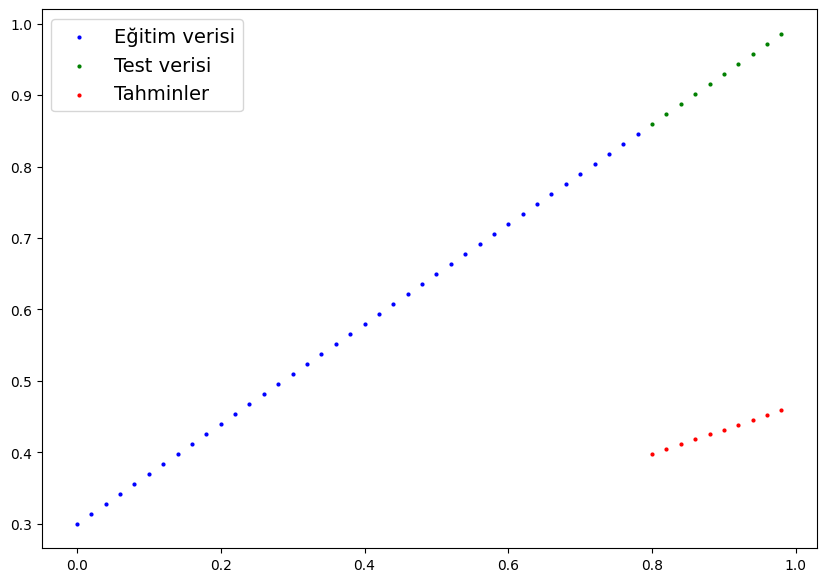

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Vay! Bu tahminler oldukça kötü görünüyor...

Ancak bu oldukça mantıklı çünkü modelimiz şu anda tahmin yapmak için rastgele parametre değerleri kullanıyor.

Model, yeşil noktaları tahmin etmeye çalışmak için mavi noktalara bile bakmadı.

Bunu değiştirme zamanı geldi.


## 3. Modeli Eğitme

Şu anda modelimiz rastgele parametreler kullanarak tahmin yapıyor, yani aslında rastgele tahminlerde bulunuyor.

Bunu düzeltmek için, modelin iç parametrelerini (*parametreler* terimini *kalıplar* olarak da düşünebilirsiniz), `nn.Parameter()` ve `torch.randn()` ile rastgele başlattığımız `weights` (ağırlık) ve `bias` (sapma) değerlerini veriyi daha iyi temsil edecek şekilde güncelleyebiliriz.

Bu değerleri (başlangıçta belirlediğimiz `weight=0.7` ve `bias=0.3`) manuel olarak ayarlayabiliriz ama bu pek eğlenceli olmaz!

Çoğu zaman bir model için ideal parametrelerin ne olduğunu bilemezsiniz.

Bunun yerine, kod yazarak modelin bu parametreleri kendi kendine öğrenip öğrenemeyeceğini görmek çok daha eğlencelidir.


### PyTorch'ta Kayıp Fonksiyonu ve Optimizasyon Yöntemi Oluşturma

Modelimizin parametrelerini kendi kendine güncelleyebilmesi için birkaç şey daha eklememiz gerekiyor.

Bunlar **kayıp fonksiyonu (loss function)** ve **optimizasyon yöntemi (optimizer)**.

Bunların görevleri:

| **Fonksiyon** | **Ne İşe Yarar?** | **PyTorch'ta Nerede?** | **Yaygın Kullanımlar** |
| ------------- | ----------------- | ---------------------- | --------------------- |
| **Kayıp Fonksiyonu** | Modelin tahminlerinin (örneğin `y_preds`) gerçek etiketlerden (örneğin `y_test`) ne kadar sapma gösterdiğini ölçer. Ne kadar düşükse o kadar iyidir. | [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions) içinde birçok yerleşik kayıp fonksiyonu bulunur. | Regresyon problemleri için Ortalama Mutlak Hata (MAE) ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). İkili sınıflandırma için Binary Cross Entropy ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)). |
| **Optimizasyon Yöntemi** | Modelin iç parametrelerini kaybı minimize edecek şekilde nasıl güncelleyeceğini belirler. | [`torch.optim`](https://pytorch.org/docs/stable/optim.html) içinde çeşitli optimizasyon yöntemleri bulunur. | Stokastik Gradyan İnişi (SGD) ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizasyonu ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Haydi, modelimizi iyileştirmek için bir kayıp fonksiyonu ve optimizasyon yöntemi oluşturalım.

Çalıştığınız probleme bağlı olarak kullanacağınız kayıp fonksiyonu ve optimizasyon yöntemi değişir.  
Ancak regresyon problemlerinde MAE (`torch.nn.L1Loss()`) ve sınıflandırma problemlerinde Binary Cross Entropy yaygın olarak kullanılır.  

Bizim problemimizde sayı tahmini yaptığımız için, kayıp fonksiyonu olarak **MAE**'yi (`torch.nn.L1Loss()`) kullanacağız.  

![MAE kaybının görselleştirilmiş hali](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)  
*Ortalama Mutlak Hata (MAE, PyTorch: `torch.nn.L1Loss`), tahminler ile gerçek değerler arasındaki mutlak farkı ölçer ve tüm örnekler üzerinde ortalamasını alır.*

Optimizasyon yöntemi olarak ise **SGD** (Stochastic Gradient Descent) kullanacağız:  
`torch.optim.SGD(params, lr)`

- `params`: Optimize etmek istediğimiz model parametreleri (örneğin, rastgele başlattığımız `weights` ve `bias`).  
- `lr`: **Öğrenme oranı (learning rate)**. Parametrelerin ne kadar hızlı güncelleneceğini belirler. Daha yüksek değerler daha büyük adımlar atar (bazen çok büyük olabilir ve model öğrenemez), daha düşük değerler daha küçük adımlar atar (çok küçük olursa öğrenme süresi uzayabilir). Öğrenme oranı bir **hiperparametre**dir ve genellikle `0.01`, `0.001`, `0.0001` gibi değerlerle başlanır. Zamanla ayarlanabilir ([öğrenme oranı zamanlaması](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

Bu çok fazla bilgi gibi görünüyor, haydi bunu kodda görelim.


In [14]:
# Kayıp fonksiyonunu oluştur
loss_fn = nn.L1Loss()  # MAE kaybı, L1Loss ile aynıdır

# Optimizasyon yöntemini oluştur
optimizer = torch.optim.SGD(params=model_0.parameters(),  # Optimize edilecek modelin parametreleri
                            lr=0.01)  # Öğrenme oranı (her adımda parametrelerin ne kadar değişeceğini belirler, yüksek değer = daha fazla (daha az stabil), düşük değer = daha az (daha uzun sürebilir))


### PyTorch'ta Optimizasyon Döngüsü Oluşturma

Harika! Artık bir kayıp fonksiyonumuz ve optimizasyon yöntemimiz var. Şimdi sırada **eğitim döngüsü** (**training loop**) ve **test döngüsü** (**testing loop**) oluşturmak var.

- **Eğitim Döngüsü (Training Loop):** Modelin eğitim verisinden geçerek `özellikler` (features) ve `etiketler` (labels) arasındaki ilişkiyi öğrenmesini sağlar.  
- **Test Döngüsü (Testing Loop):** Modelin hiç görmediği test verisi üzerinden geçerek, eğitim sırasında öğrendiği kalıpların ne kadar iyi olduğunu değerlendirir.  

Bunlara "döngü" denir çünkü modelimizin her bir veri örneğini tekrar tekrar gözden geçirmesini isteriz.

Bu döngüleri oluşturmak için [resmi olmayan PyTorch optimizasyon döngüsü şarkısı](https://twitter.com/mrdbourke/status/1450977868406673410?s=20) (bir de [video versiyonu](https://youtu.be/Nutpusq_AFw) var) temasıyla Python `for` döngüsü yazacağız.  

![resmi olmayan pytorch optimizasyon döngüsü şarkısı](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png)  
*PyTorch eğitim ve test döngülerini hatırlamanın eğlenceli bir yolu.*

Kod biraz uzun olabilir ama üstesinden gelebiliriz!


### PyTorch Eğitim Döngüsü

Eğitim döngüsü için şu adımları oluşturacağız:

| **Adım No** | **Adım Adı** | **Ne Yapar?** | **Kod Örneği** |
| ------------ | ------------- | -------------- | --------------- |
| 1 | **İleri Geçiş (Forward Pass)** | Model, tüm eğitim verisinden bir kez geçer ve `forward()` fonksiyonunu kullanarak hesaplamalarını yapar. | `model(X_train)` |
| 2 | **Kayıp Hesaplama** | Modelin çıktıları (tahminler), gerçek değerlerle karşılaştırılır ve ne kadar yanlış oldukları ölçülür. | `loss = loss_fn(y_pred, y_train)` |
| 3 | **Gradyanları Sıfırlama** | Optimizasyon için gradyanlar sıfırlanır (varsayılan olarak birikirler), böylece belirli eğitim adımı için yeniden hesaplanabilirler. | `optimizer.zero_grad()` |
| 4 | **Kayıp Üzerinden Geri Yayılım (Backpropagation)** | Kayıp fonksiyonunun model parametreleri üzerindeki gradyanları hesaplanır (`requires_grad=True` olan parametreler için). Bu işleme **geri yayılım** denir. | `loss.backward()` |
| 5 | **Optimizasyon Adımı (Gradyan İnişi)** | Gradyanlar doğrultusunda modelin öğrenilebilir parametreleri güncellenir. | `optimizer.step()` |

![pytorch eğitim döngüsü](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Not:** Yukarıdaki adımlar, eğitim döngüsünün nasıl sıralanabileceğine dair bir örnektir. Deneyim kazandıkça, PyTorch eğitim döngülerinin oldukça esnek olduğunu göreceksiniz.  
>
> Adımların sıralaması için bazı temel kurallar:
> * **Kayıp hesaplaması** (`loss = ...`), geri yayılımdan (`loss.backward()`) *önce* yapılmalıdır.  
> * **Gradyanlar sıfırlanmalı** (`optimizer.zero_grad()`), kayıp fonksiyonunun gradyanları hesaplanmadan (`loss.backward()`) *önce* yapılmalıdır.  
> * **Optimizasyon adımı** (`optimizer.step()`), geri yayılımdan (`loss.backward()`) *sonra* yapılmalıdır.  

Geri yayılım (backpropagation) ve gradyan inişi (gradient descent) süreçlerinin nasıl çalıştığını daha iyi anlamak için ekstra kaynakları inceleyebilirsiniz.


### PyTorch Test Döngüsü

Modelimizi değerlendirmek için test döngüsünde genellikle şu adımlar yer alır:

| **Adım No** | **Adım Adı** | **Ne Yapar?** | **Kod Örneği** |
| ------------ | ------------- | -------------- | --------------- |
| 1 | **İleri Geçiş (Forward Pass)** | Model, tüm test verisinden bir kez geçer ve `forward()` fonksiyonunu kullanarak hesaplamalarını yapar. | `model(X_test)` |
| 2 | **Kayıp Hesaplama** | Modelin çıktıları (tahminler), gerçek değerlerle karşılaştırılır ve ne kadar yanlış oldukları ölçülür. | `loss = loss_fn(y_pred, y_test)` |
| 3 | **Değerlendirme Metriklerini Hesaplama (Opsiyonel)** | Kayıp değeri dışında, test seti üzerindeki doğruluk gibi başka değerlendirme metrikleri de hesaplanabilir. | Özel fonksiyonlar |

Dikkat edin, test döngüsünde geri yayılım (`loss.backward()`) veya optimizasyon adımı (`optimizer.step()`) yer almaz. Bunun nedeni, test sırasında modelin parametrelerinin değiştirilmemesidir; bu parametreler zaten eğitim sırasında öğrenilmiştir.  
Test aşamasında yalnızca modelin ileri geçiş (forward pass) çıktılarıyla ilgileniriz.

![pytorch açıklamalı test döngüsü](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Şimdi yukarıdaki tüm adımları birleştirip modelimizi **100 epoch** boyunca eğitelim ve her 10 epoch'ta bir değerlendirelim.


In [15]:
torch.manual_seed(42)

# Epoch sayısını belirle (modelin eğitim verisi üzerinde kaç kez geçiş yapacağını belirler)
epochs = 100

# Kayıp değerlerini takip etmek için boş listeler oluştur
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Eğitim Aşaması

    # Modeli eğitim moduna al (varsayılan moddur)
    model_0.train()

    # 1. Eğitim verisi üzerinde ileri geçiş (forward pass)
    y_pred = model_0(X_train)

    # 2. Kayıp hesaplama (modelin tahminleri ile gerçek değerler arasındaki fark)
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizasyonun gradyanlarını sıfırla
    optimizer.zero_grad()

    # 4. Geri yayılım (backpropagation)
    loss.backward()

    # 5. Optimizasyonu ilerlet (ağırlıkları güncelle)
    optimizer.step()

    ### Test Aşaması

    # Modeli değerlendirme moduna al
    model_0.eval()

    with torch.inference_mode():
        # 1. Test verisi üzerinde ileri geçiş
        test_pred = model_0(X_test)

        # 2. Test verisi için kayıp hesaplama
        test_loss = loss_fn(test_pred, y_test.type(torch.float))  # Tahminler torch.float türünde olduğu için, karşılaştırmalar aynı türde yapılmalı

        # Her 10 epoch'ta bir durumu yazdır
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Eğitim Kaybı: {loss} | MAE Test Kaybı: {test_loss}")


Epoch: 0 | MAE Eğitim Kaybı: 0.31288138031959534 | MAE Test Kaybı: 0.48106518387794495
Epoch: 10 | MAE Eğitim Kaybı: 0.1976713240146637 | MAE Test Kaybı: 0.3463551998138428
Epoch: 20 | MAE Eğitim Kaybı: 0.08908725529909134 | MAE Test Kaybı: 0.21729660034179688
Epoch: 30 | MAE Eğitim Kaybı: 0.053148526698350906 | MAE Test Kaybı: 0.14464017748832703
Epoch: 40 | MAE Eğitim Kaybı: 0.04543796554207802 | MAE Test Kaybı: 0.11360953003168106
Epoch: 50 | MAE Eğitim Kaybı: 0.04167863354086876 | MAE Test Kaybı: 0.09919948130846024
Epoch: 60 | MAE Eğitim Kaybı: 0.03818932920694351 | MAE Test Kaybı: 0.08886633068323135
Epoch: 70 | MAE Eğitim Kaybı: 0.03476089984178543 | MAE Test Kaybı: 0.0805937647819519
Epoch: 80 | MAE Eğitim Kaybı: 0.03132382780313492 | MAE Test Kaybı: 0.07232122868299484
Epoch: 90 | MAE Eğitim Kaybı: 0.02788739837706089 | MAE Test Kaybı: 0.06473556160926819


Vay canına! Görünüşe göre kayıp değerimiz her epoch'ta azalıyor. Haydi bunu görselleştirerek doğrulayalım.


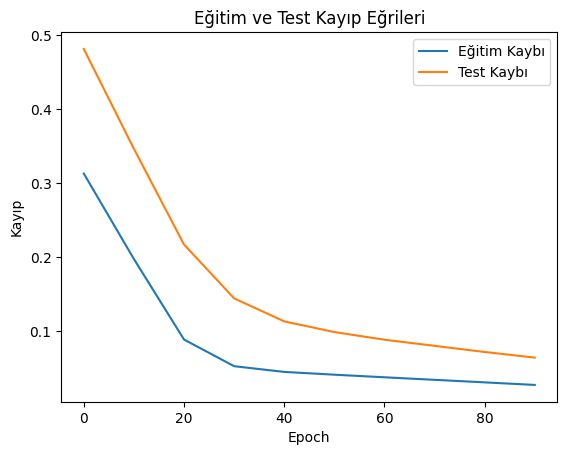

In [16]:
# Kayıp Eğrilerini Çizdirme

plt.plot(epoch_count, train_loss_values, label="Eğitim Kaybı")
plt.plot(epoch_count, test_loss_values, label="Test Kaybı")
plt.title("Eğitim ve Test Kayıp Eğrileri")
plt.ylabel("Kayıp")
plt.xlabel("Epoch")
plt.legend();


Harika! **Kayıp eğrileri**, kaybın zamanla azaldığını gösteriyor. Unutmayın, kayıp modelinizin ne kadar *yanlış* olduğunu ölçer, dolayısıyla daha düşük olması daha iyidir.

Peki, kayıp neden azaldı?

Kayıp fonksiyonumuz ve optimizasyon yöntemimiz sayesinde modelin iç parametreleri (`weights` ve `bias`), verideki temel kalıpları daha iyi yansıtacak şekilde güncellendi.

Haydi, modelimizin [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) metodunu inceleyerek ağırlıklar ve bias için belirlediğimiz orijinal değerlere ne kadar yaklaştığını görelim.


In [17]:
# Modelimizin öğrendiği parametreleri bulalım
print("Modelin öğrendiği ağırlık ve bias değerleri:")
print(model_0.state_dict())
print("\nVe orijinal ağırlık ve bias değerleri:")
print(f"ağırlık: {weight}, bias: {bias}")


Modelin öğrendiği ağırlık ve bias değerleri:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

Ve orijinal ağırlık ve bias değerleri:
ağırlık: 0.7, bias: 0.3


Vay canına! Ne kadar havalı değil mi?

Modelimiz, `weight` ve `bias` için belirlediğimiz orijinal değerlere oldukça yaklaştı (ve muhtemelen daha uzun süre eğitirsek daha da yaklaşır).

> **Alıştırma:** Yukarıdaki `epochs` değerini 200 olarak değiştirin. Kayıp eğrileri ve modelin ağırlık ve bias parametrelerinde ne gibi değişiklikler oluyor?

Model bu değerleri *mükemmel* şekilde tahmin edemeyebilir (özellikle daha karmaşık veri setlerinde) ama bu sorun değil. Genellikle yakın bir tahmin bile oldukça etkileyici sonuçlar verebilir.

Makine öğrenimi ve derin öğrenmenin temel fikri de budur: **verimizi tanımlayan bazı ideal değerler vardır** ve bunları elle hesaplamak yerine, **bir modeli bu değerleri programatik olarak bulması için eğitebiliriz**.


## 4. Eğitilmiş Bir PyTorch Modeli ile Tahmin Yapma (Çıkarım)

Bir modeli eğittikten sonra, büyük ihtimalle onunla tahminler yapmak isteyeceksiniz.

Bunun bir kısmını yukarıdaki eğitim ve test kodunda görmüştük, ancak eğitim/test döngüsü dışında tahmin yapmak için adımlar benzerdir.

PyTorch modeli ile tahmin (çıkarım) yaparken hatırlanması gereken üç önemli nokta vardır:

1. **Modeli değerlendirme moduna al** (`model.eval()`).
2. **Tahminleri çıkarım modu ile yap** (`with torch.inference_mode(): ...`).
3. **Tüm tahminler aynı cihazda yapılmalı** (örneğin, veri ve model yalnızca GPU'da veya yalnızca CPU'da olmalı).

İlk iki madde, PyTorch'un eğitim sırasında arka planda yaptığı ancak çıkarım için gerekli olmayan tüm hesaplamaları ve ayarları devre dışı bırakır (**daha hızlı işlem** sağlar). Üçüncü madde ise cihazlar arası hataları önler.


In [18]:
# 1. Modeli değerlendirme moduna al
model_0.eval()

# 2. Çıkarım modu context manager'ını başlat
with torch.inference_mode():
  # 3. Hesaplamaların model ve veri aynı cihazda yapılmasını sağla
  # Bizim durumumuzda cihazdan bağımsız kod henüz yazmadık, bu yüzden veri ve model
  # varsayılan olarak CPU'da çalışıyor.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds


tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

Harika! Eğitilmiş modelimizle bazı tahminler yaptık, şimdi bu tahminler nasıl görünüyor bir bakalım!


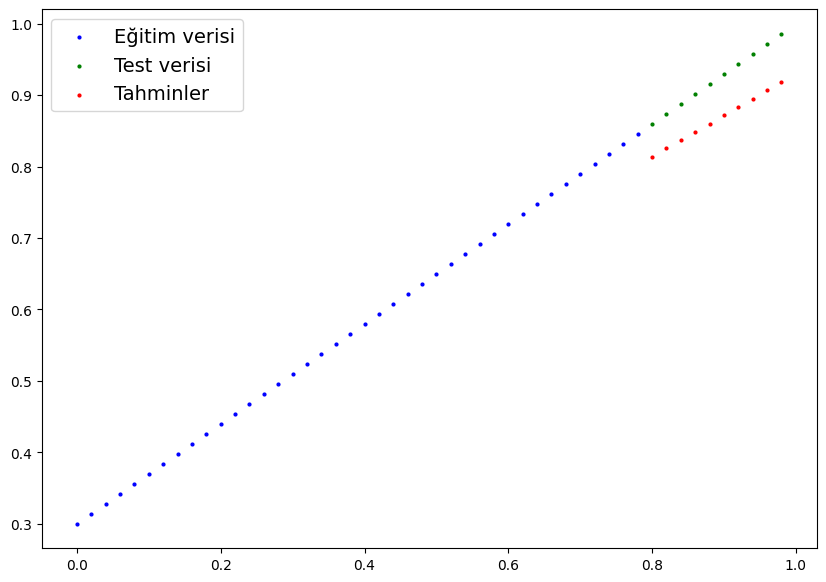

In [19]:
# Tahminleri görselleştir
plot_predictions(predictions=y_preds)


Harika! Kırmızı noktalar önceye göre çok daha yakın görünüyor!

Şimdi PyTorch'ta bir modeli kaydetme ve yeniden yükleme işlemine geçelim.


## 5. PyTorch Modelini Kaydetme ve Yükleme

Eğer bir PyTorch modeli eğittiyseniz, büyük ihtimalle onu kaydetmek ve bir yere aktarmak isteyeceksiniz.

Örneğin, modeli Google Colab'da veya yerel bilgisayarınızda GPU ile eğitmiş olabilirsiniz ancak artık başkalarının kullanabileceği bir uygulamaya aktarmak isteyebilirsiniz.

Ya da model üzerindeki ilerlemenizi kaydedip daha sonra devam etmek isteyebilirsiniz.

PyTorch'ta modelleri kaydetmek ve yüklemek için bilmeniz gereken üç ana yöntem vardır (bunlar [PyTorch model kaydetme ve yükleme rehberi](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)'nden alınmıştır):

| **PyTorch Yöntemi** | **Ne İşe Yarar?** |
| -------------------- | ----------------- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Python'un [`pickle`](https://docs.python.org/3/library/pickle.html) aracı kullanılarak serileştirilmiş bir nesneyi diske kaydeder. Modeller, tensörler ve sözlükler gibi çeşitli Python nesneleri `torch.save` ile kaydedilebilir. |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | `pickle`'ın deserialization özelliklerini kullanarak kaydedilmiş Python nesne dosyalarını (model, tensör, sözlük gibi) belleğe yükler. Hangi cihaza (CPU, GPU vb.) yükleneceğini de belirtebilirsiniz. |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict) | Kaydedilmiş bir `state_dict()` nesnesini kullanarak bir modelin parametre sözlüğünü (`model.state_dict()`) yükler. |

> **Not:** [Python'un `pickle` dökümantasyonunda](https://docs.python.org/3/library/pickle.html) belirtildiği gibi, `pickle` modülü **güvenli değildir**. Bu nedenle yalnızca güvendiğiniz verileri yüklemelisiniz. PyTorch modelleri için de bu geçerlidir. Yalnızca güvenilir kaynaklardan kaydedilmiş PyTorch modellerini kullanın.


### PyTorch Modelinin `state_dict()`'ini Kaydetme

Modeli çıkarım (tahmin) için kaydetmenin ve yüklemenin [önerilen yolu](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference), modelin `state_dict()`'ini kaydedip yüklemektir.

Bunu birkaç adımda nasıl yapabileceğimize bakalım:

1. Python'un `pathlib` modülünü kullanarak modelleri kaydetmek için `models` adında bir dizin oluşturacağız.  
2. Modeli kaydetmek için bir dosya yolu oluşturacağız.  
3. `torch.save(obj, f)` komutunu kullanacağız. Burada `obj` kaydedilecek modelin `state_dict()`'i ve `f` modelin kaydedileceği dosya adıdır.  

> **Not:** PyTorch'ta kaydedilen model veya nesnelerin dosya uzantısının `.pt` veya `.pth` ile bitmesi yaygın bir uygulamadır, örneğin: `saved_model_01.pth`.


In [20]:
from pathlib import Path

# 1. Modeller için bir dizin oluştur
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Modeli kaydetmek için bir dosya yolu oluştur
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Modelin state_dict()'ini kaydet
print(f"Model şu konuma kaydediliyor: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),  # Yalnızca state_dict() kaydedilirse modelin öğrenilmiş parametreleri kaydedilir
           f=MODEL_SAVE_PATH)


Model şu konuma kaydediliyor: models/01_pytorch_workflow_model_0.pth


In [21]:
# Kaydedilen dosya yolunu kontrol et
!ls -l models/01_pytorch_workflow_model_0.pth


-rw-r--r-- 1 root root 1680 Jan 16 20:14 models/01_pytorch_workflow_model_0.pth


### Kaydedilmiş Bir PyTorch Modelinin `state_dict()`'ini Yükleme

Artık `models/01_pytorch_workflow_model_0.pth` yolunda kaydedilmiş bir model `state_dict()`'imiz olduğuna göre, bunu `torch.nn.Module.load_state_dict(torch.load(f))` yöntemiyle yükleyebiliriz. Burada `f`, kaydedilmiş modelin `state_dict()` dosya yoludur.

**Neden `torch.nn.Module.load_state_dict()` içinde `torch.load()` kullanıyoruz?**

Çünkü sadece modelin `state_dict()`'ini (öğrenilmiş parametrelerin sözlüğünü) kaydettik, modelin *tamamını* değil. Öncelikle `torch.load()` ile `state_dict()`'i yüklememiz ve ardından bu `state_dict()`'i modelimizin yeni bir örneğine (ki bu `nn.Module` sınıfının bir alt sınıfıdır) aktarmamız gerekiyor.

**Neden tüm modeli kaydetmiyoruz?**

[Tüm modeli kaydetmek](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) daha sezgisel olsa da, PyTorch dokümantasyonunda belirtildiği gibi (*italik metin bana ait*):

> Bu yaklaşımın *(tüm modeli kaydetmenin)* dezavantajı, serileştirilmiş verinin belirli sınıflara ve modelin kaydedildiği dizin yapısına bağlı olmasıdır...  
>
> Bu nedenle, kodunuz başka projelerde veya yeniden yapılandırmalardan sonra çeşitli şekillerde bozulabilir.

Bu yüzden, yalnızca modelin parametrelerini içeren `state_dict()`'i kaydetmek ve yüklemek daha esnek bir yöntemdir.

Haydi bunu test edelim! `LinearRegressionModel()` sınıfından yeni bir örnek oluşturalım ve ardından `load_state_dict()` ile modelin parametrelerini yükleyelim.


In [22]:
# Modelimizin yeni bir örneğini oluştur (bu rastgele ağırlıklarla başlatılacak)
loaded_model_0 = LinearRegressionModel()

# Kaydedilmiş modelin state_dict'ini yükle (bu, yeni model örneğini eğitilmiş ağırlıklarla güncelleyecek)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-22-6cfb228f60ee>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

Mükemmel! Görünüşe göre her şey uyuştu.

Şimdi, yüklediğimiz modelimizi test etmek için onunla çıkarım (tahmin) yapalım.

PyTorch modelleriyle çıkarım yaparken uyulması gereken kuralları hatırlıyor musunuz?

Hatırlamıyorsanız işte bir hatırlatma:

<details>
    <summary>PyTorch Çıkarım Kuralları</summary>
    <ol>
      <li>Modeli değerlendirme moduna alın (<code>model.eval()</code>).</li>
      <li>Inference mode context manager kullanarak tahmin yapın (<code>with torch.inference_mode(): ...</code>).</li>
      <li>Tüm tahminlerin aynı cihazda yapılması gerektiğini unutmayın (örneğin, veri ve model yalnızca GPU'da ya da yalnızca CPU'da olmalı).</li>
    </ol>
</details>


In [23]:
# 1. Yüklenen modeli değerlendirme moduna al
loaded_model_0.eval()

# 2. Çıkarım modu context manager'ını kullanarak tahmin yap
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)  # Yüklenen modelle test verisi üzerinde ileri geçiş (forward pass) yap


Artık yüklenen modelle bazı tahminler yaptık, şimdi bunların önceki tahminlerle aynı olup olmadığını kontrol edelim.


In [24]:
# Önceki modelin tahminleri ile yüklenen modelin tahminlerini karşılaştır (aynı olmalılar)
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Harika!

Görünüşe göre yüklenen modelin tahminleri, kaydetmeden önce yapılan önceki model tahminleriyle aynı. Bu, modelimizin beklendiği gibi kaydedilip yüklendiğini gösteriyor.

> **Not:** PyTorch modellerini kaydetmek ve yüklemek için daha fazla yöntem vardır, ancak bunları ek kaynaklar ve ileri okumalar için bırakıyorum. Daha fazla bilgi için [PyTorch model kaydetme ve yükleme rehberine](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) göz atabilirsiniz.


## 6. Her Şeyi Birleştirme

Şimdiye kadar oldukça fazla konuyu ele aldık.

Ancak biraz pratik yaptıktan sonra yukarıdaki adımları sanki sokakta dans ediyormuş gibi kolayca uygulayacaksınız.

Pratik demişken, şimdiye kadar yaptığımız her şeyi bir araya getirelim.

Bu sefer kodumuzu cihazdan bağımsız hale getireceğiz (eğer bir GPU varsa onu kullanacak, yoksa varsayılan olarak CPU'yu kullanacak).

Bu bölümde önceki kadar açıklama olmayacak çünkü üzerinden geçtiğimiz konuları tekrar edeceğiz.

İlk olarak, ihtiyacımız olan standart kütüphaneleri içe aktararak başlayacağız.

> **Not:** Google Colab kullanıyorsanız, GPU kurulumunu yapmak için: Runtime -> Change runtime type -> Hardware acceleration -> GPU adımlarını izleyin. Bunu yaptığınızda Colab çalışma zamanı sıfırlanır ve kaydedilmiş değişkenler silinir.


In [25]:
# PyTorch ve matplotlib kütüphanelerini içe aktar
import torch
from torch import nn  # nn, PyTorch'un sinir ağları için tüm yapı taşlarını içerir
import matplotlib.pyplot as plt

# PyTorch sürümünü kontrol et
torch.__version__


'2.5.1+cu121'

Şimdi kodumuzu cihazdan bağımsız hale getirelim. Eğer GPU (CUDA) mevcutsa `device="cuda"` olarak ayarlayacağız, aksi takdirde varsayılan olarak `device="cpu"` kullanılacak.


In [26]:
# Cihazdan bağımsız kodu ayarla
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Kullanılan cihaz: {device}")


Kullanılan cihaz: cpu


Eğer bir GPU erişiminiz varsa, yukarıdaki kod şu çıktıyı vermiş olmalı:

```
Using device: cuda
```

Aksi takdirde, aşağıdaki hesaplamalar için CPU kullanılacak. Küçük veri setimiz için bu yeterli ancak daha büyük veri setlerinde işlemler daha uzun sürebilir.


### 6.1 Veri

Daha önce yaptığımız gibi bazı veriler oluşturalım.

Önce, bazı `weight` (ağırlık) ve `bias` (sapma) değerlerini sabit olarak belirleyeceğiz.

Ardından, 0 ile 1 arasında bir sayı aralığı oluşturacağız, bunlar bizim `X` değerlerimiz olacak.

Son olarak, doğrusal regresyon formülünü (`y = weight * X + bias`) kullanarak `X`, `weight` ve `bias` değerlerinden `y` değerlerini oluşturacağız.


In [27]:
# Ağırlık ve bias oluştur
weight = 0.7
bias = 0.3

# Değer aralığını oluştur
start = 0
end = 1
step = 0.02

# X ve y (özellikler ve etiketler) oluştur
X = torch.arange(start, end, step).unsqueeze(dim=1)  # unsqueeze kullanılmazsa, ileride lineer katmanlarda şekil uyuşmazlıkları oluşur
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Harika!

Artık elimizde bazı veriler var, şimdi bunu eğitim ve test setlerine ayıralım.

Veriyi %80 eğitim ve %20 test olacak şekilde böleceğiz.


In [28]:
# Veriyi eğitim ve test olarak ayır
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]  # Eğitim verisi
X_test, y_test = X[train_split:], y[train_split:]    # Test verisi

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

Harika, şimdi verileri görselleştirerek her şeyin yolunda olup olmadığını kontrol edelim.


# Not: Eğer çalışma zamanınızı sıfırladıysanız, bu fonksiyon çalışmayacaktır.
# Yukarıda fonksiyonun tanımlandığı hücreyi tekrar çalıştırmanız gerekir.
plot_predictions(X_train, y_train, X_test, y_test)


### 6.2 PyTorch Doğrusal Modeli Oluşturma

Artık elimizde bazı veriler var, şimdi bir model oluşturalım.

Daha önce oluşturduğumuz modele benzer bir model yapacağız. Ancak bu sefer, modelimizin ağırlık ve bias parametrelerini manuel olarak `nn.Parameter()` ile tanımlamak yerine, bunun için [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) kullanacağız.

Burada:
- **`in_features`**: Girdi verimizin sahip olduğu özellik (boyut) sayısıdır.  
- **`out_features`**: Çıktı verisinin sahip olmasını istediğimiz özellik (boyut) sayısıdır.  

Bizim durumumuzda her ikisi de **1**, çünkü verimizde her bir etiket (`y`) için bir giriş özelliği (`X`) bulunuyor.

![nn.Parameter ve nn.Linear kullanarak oluşturulan doğrusal regresyon modellerinin karşılaştırması](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)  
*`nn.Parameter` kullanarak doğrusal regresyon modeli oluşturma ile `nn.Linear` kullanarak oluşturma karşılaştırması. `torch.nn` modülü, birçok popüler ve kullanışlı sinir ağı katmanını içeren hazır hesaplamalar sunar.*


In [29]:
# nn.Module sınıfını genişleterek modelimizi oluştur
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Model parametrelerini oluşturmak için nn.Linear() kullan
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # İleri hesaplamayı tanımla (girdi verisi x, nn.Linear() katmanından geçer)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Model oluşturulurken manuel tohumlama yap (bu her zaman gerekli değildir, ama gösterim amacıyla kullanılmıştır. Yoruma alıp sonucu gözlemleyebilirsiniz)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

`model_1.state_dict()` çıktısındaki değerlere dikkat edin, `nn.Linear()` katmanı bizim için rastgele bir `weight` (ağırlık) ve `bias` (sapma) parametresi oluşturdu.

Şimdi modelimizi GPU'ya (eğer mevcutsa) taşıyalım.

PyTorch nesnelerinin cihazını değiştirmek için `.to(device)` metodunu kullanabiliriz.

Önce modelimizin şu anda hangi cihazda olduğunu kontrol edelim.


In [30]:
# Modelin mevcut cihazını kontrol et
next(model_1.parameters()).device


device(type='cpu')

Harika, model varsayılan olarak CPU üzerinde görünüyor.

Şimdi onu GPU'ya (mevcutsa) taşıyalım.


In [31]:
# Modeli GPU'ya taşı (mevcutsa), aksi takdirde varsayılan olarak CPU'da kalır
model_1.to(device)  # device değişkeni yukarıda "cuda" (GPU) veya "cpu" olarak ayarlanmıştı
next(model_1.parameters()).device


device(type='cpu')

Harika! Cihazdan bağımsız kodumuz sayesinde, yukarıdaki hücre GPU mevcut olsun ya da olmasın sorunsuz çalışacak.

Eğer CUDA destekli bir GPU'ya erişiminiz varsa, çıktınız şu şekilde olmalı:

```
device(type='cuda', index=0)
```

### 6.3 Eğitim

Şimdi bir eğitim ve test döngüsü oluşturalım.

Öncelikle bir kayıp fonksiyonuna ve bir optimizasyona ihtiyacımız var.

Daha önce kullandığımız fonksiyonları, `nn.L1Loss()` ve `torch.optim.SGD()` kullanalım.

Optimizasyonun eğitim sırasında modelin parametrelerini ayarlayabilmesi için yeni modelin parametrelerini (`model.parameters()`) optimizere aktarmamız gerekecek.

Daha önce iyi sonuç veren `0.01` öğrenme oranını tekrar kullanalım.


In [32]:
# Kayıp fonksiyonunu oluştur
loss_fn = nn.L1Loss()

# Optimizasyon yöntemini oluştur
optimizer = torch.optim.SGD(params=model_1.parameters(),  # yeni oluşturulan modelin parametrelerini optimize et
                            lr=0.01)


Harika, kayıp fonksiyonu ve optimizer hazır. Şimdi eğitim ve test döngüsü ile modelimizi eğitip değerlendirelim.

Bu adımda önceki eğitim döngüsünden farklı olarak, verileri hedef `device` üzerine taşıyacağız.

Modelimizi zaten `model_1.to(device)` komutuyla hedef cihaza taşımıştık.

Aynı işlemi veriler için de yapabiliriz.

Bu şekilde model GPU'daysa veriler de GPU'da olacak (veya CPU'daysa CPU'da olacak).

Bu sefer işleri bir adım ileri taşıyalım ve `epochs=1000` olarak ayarlayalım.

PyTorch eğitim döngüsü adımlarını hatırlamak isterseniz aşağıya bakabilirsiniz.

<details>
    <summary>PyTorch Eğitim Döngüsü Adımları</summary>
    <ol>
        <li><b>İleri geçiş (Forward pass)</b> - Model, eğitim verisinin tamamından bir kez geçerek <code>forward()</code> fonksiyonunu uygular (<code>model(x_train)</code>).</li>
        <li><b>Kayıp hesaplama</b> - Modelin çıktıları (tahminler), gerçek değerlerle karşılaştırılır ve ne kadar yanlış oldukları değerlendirilir (<code>loss = loss_fn(y_pred, y_train)</code>).</li>
        <li><b>Gradyanları sıfırlama</b> - Optimizasyonun gradyanları sıfırlanır (<code>optimizer.zero_grad()</code>), böylece her eğitim adımı için yeniden hesaplanabilir.</li>
        <li><b>Geri yayılım (Backpropagation)</b> - Kayıp fonksiyonunun model parametreleri üzerindeki gradyanları hesaplanır (<code>loss.backward()</code>).</li>
        <li><b>Optimizasyon adımı (Gradient descent)</b> - Model parametreleri gradyanlar doğrultusunda güncellenir (<code>optimizer.step()</code>).</li>
    </ol>
</details>


In [33]:
torch.manual_seed(42)

# Epoch sayısını ayarla
epochs = 1000

# Verileri mevcut cihaza taşı
# Bu yapılmazsa hata oluşur (model/veri aynı cihazda olmalı)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Eğitim
    model_1.train()  # Modeli eğitim moduna al (varsayılan olarak açık)

    # 1. İleri geçiş (Forward pass)
    y_pred = model_1(X_train)

    # 2. Kayıp hesaplama
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizasyonun gradyanlarını sıfırla
    optimizer.zero_grad()

    # 4. Geri yayılım (Backpropagation)
    loss.backward()

    # 5. Optimizasyon adımı
    optimizer.step()

    ### Test
    model_1.eval()  # Test (çıkarım) için modeli değerlendirme moduna al
    # 1. İleri geçiş
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Kayıp hesaplama
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Eğitim Kaybı: {loss} | Test Kaybı: {test_loss}")


Epoch: 0 | Eğitim Kaybı: 0.5551779866218567 | Test Kaybı: 0.5739762187004089
Epoch: 100 | Eğitim Kaybı: 0.006215679459273815 | Test Kaybı: 0.014086711220443249
Epoch: 200 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 300 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 400 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 500 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 600 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 700 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 800 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904
Epoch: 900 | Eğitim Kaybı: 0.0012645035749301314 | Test Kaybı: 0.013801807537674904


> **Not:** Makine öğreniminin rastgele doğası nedeniyle, modeliniz CPU veya GPU üzerinde eğitildiğinde (aynı rastgele tohum kullanılsa bile) farklı sonuçlar (farklı kayıp ve tahmin değerleri) elde edebilirsiniz. Fark büyükse hataları kontrol etmeniz gerekebilir, ancak fark küçükse (ideal olarak küçük olmalıdır) bunu göz ardı edebilirsiniz.

Harika! Kayıp değeri oldukça düşük görünüyor.

Şimdi modelimizin öğrendiği parametreleri kontrol edelim ve bunları başlangıçta sabit olarak belirlediğimiz orijinal parametrelerle karşılaştıralım.


In [34]:
# Modelimizin öğrendiği parametreleri bulalım
from pprint import pprint  # pprint = daha düzenli yazdırma, bkz: https://docs.python.org/3/library/pprint.html

print("Modelin öğrendiği ağırlık ve bias değerleri:")
pprint(model_1.state_dict())

print("\nVe orijinal ağırlık ve bias değerleri:")
print(f"Ağırlık: {weight}, Bias: {bias}")


Modelin öğrendiği ağırlık ve bias değerleri:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

Ve orijinal ağırlık ve bias değerleri:
Ağırlık: 0.7, Bias: 0.3


Ho ho! Bu gerçekten mükemmel bir modele oldukça yakın.

Ama unutmayın, pratikte mükemmel parametreleri önceden bilmek nadirdir.

Ve eğer modelinizin öğrenmesi gereken parametreleri önceden biliyor olsaydınız, makine öğreniminin ne eğlencesi kalırdı ki?

Ayrıca, birçok gerçek dünya makine öğrenimi probleminde, parametre sayısı milyonları aşabilir.

Benim fikrimi sorarsanız, bu kadar çok parametreyi elle hesaplamak yerine bilgisayarın kodla öğrenmesini tercih ederim.


### 6.4 Tahmin Yapma

Artık eğitilmiş bir modelimiz var, şimdi modelimizi değerlendirme moduna alalım ve tahminler yapalım.


In [35]:
# Modeli değerlendirme moduna al
model_1.eval()

# Test verisi üzerinde tahminler yap
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

Eğer tahminleri GPU üzerindeki verilerle yapıyorsanız, yukarıdaki çıktının sonunda `device='cuda:0'` ifadesini görebilirsiniz. Bu, verilerin CUDA aygıtı 0'da (sistemin erişebildiği ilk GPU) olduğu anlamına gelir. İleride birden fazla GPU kullanırsanız, bu sayı daha yüksek olabilir.

Şimdi modelimizin tahminlerini görselleştirelim.

> **Not:** pandas, matplotlib ve NumPy gibi birçok veri bilimi kütüphanesi, GPU üzerinde depolanan verileri kullanamaz. Bu nedenle, bu kütüphanelerden birinin fonksiyonunu GPU'da bulunan bir tensör ile kullanmaya çalışırken sorun yaşayabilirsiniz. Bunu çözmek için, hedef tensörünüzü CPU'ya taşımak için [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) metodunu kullanabilirsiniz.


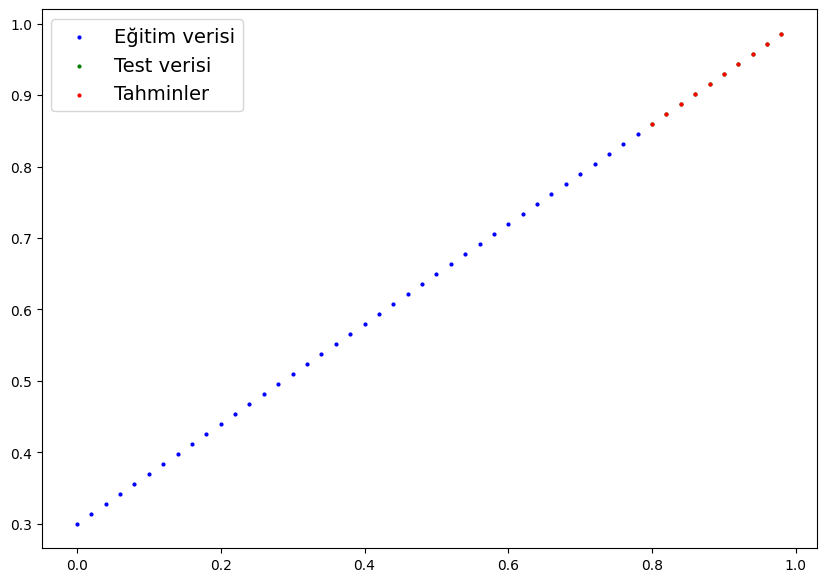

In [36]:
# plot_predictions(predictions=y_preds) # -> çalışmaz... veri CPU'da değil

# Veriyi CPU'ya taşı ve görselleştir
plot_predictions(predictions=y_preds.cpu())


Vay canına! Şu kırmızı noktalara bak, neredeyse mükemmel bir şekilde yeşil noktalarla hizalanmışlar. Sanırım ekstra epochlar işe yaradı.


### 6.5 Modeli Kaydetme ve Yükleme

Modelimizin tahminlerinden memnunuz, bu yüzden onu daha sonra kullanabilmek için bir dosyaya kaydedelim.


In [37]:
from pathlib import Path

# 1. Modeller için bir dizin oluştur
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Modeli kaydetmek için bir dosya yolu oluştur
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Modelin state_dict'ini kaydet
print(f"Model şu konuma kaydediliyor: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),  # Sadece state_dict() kaydedilir, bu da modelin öğrendiği parametreleri kaydeder
           f=MODEL_SAVE_PATH)


Model şu konuma kaydediliyor: models/01_pytorch_workflow_model_1.pth


Her şeyin düzgün çalıştığından emin olmak için modeli tekrar yükleyelim.

Şu adımları gerçekleştireceğiz:
* `LinearRegressionModelV2()` sınıfından yeni bir örnek oluşturacağız.  
* `torch.nn.Module.load_state_dict()` kullanarak modelin state_dict'ini yükleyeceğiz.  
* Yeni model örneğini hedef cihaza göndereceğiz (kodumuzun cihazdan bağımsız olması için).  


In [38]:
# LinearRegressionModelV2 sınıfından yeni bir model örneği oluştur
loaded_model_1 = LinearRegressionModelV2()

# Modelin state_dict'ini yükle
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Modeli hedef cihaza taşı (veriniz GPU'daysa, modelin de GPU'da olması gerekir)
loaded_model_1.to(device)

print(f"Yüklenen model:\n{loaded_model_1}")
print(f"Modelin bulunduğu cihaz:\n{next(loaded_model_1.parameters()).device}")


Yüklenen model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Modelin bulunduğu cihaz:
cpu


<ipython-input-38-2c0eddd73318>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


Şimdi, yüklenen modeli değerlendirerek kaydetmeden önce yapılan tahminlerle uyuşup uyuşmadığını kontrol edebiliriz.


In [39]:
# Yüklenen modeli değerlendir
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

# Önceki tahminlerle yüklenen modelin tahminlerini karşılaştır
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Her şey mükemmel görünüyor! Harika!

Oldukça yol kat ettik. Artık PyTorch'ta ilk iki sinir ağı modelini oluşturdun ve eğittin!

Şimdi bu becerilerini geliştirme zamanı.
